In [180]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import normalize

from sklearn.preprocessing import Normalizer

from pyclustertend import hopkins
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [181]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

In [182]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


* explore dataframe

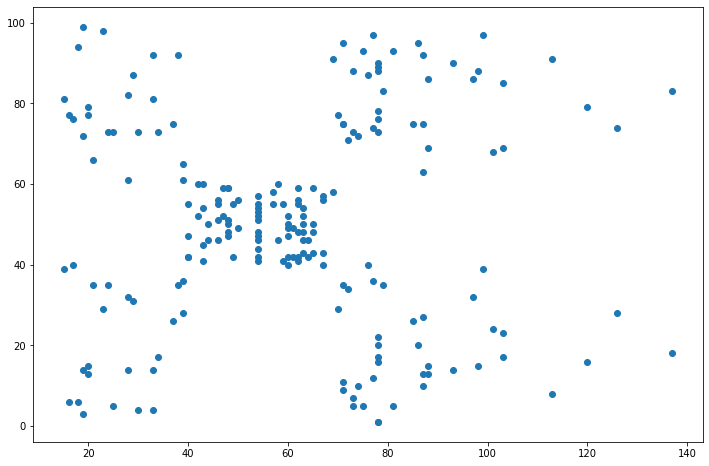

In [183]:
plt.scatter(money['Annual Income (k$)'],money['Spending Score (1-100)'])

In [184]:
money = df[['Annual Income (k$)','Spending Score (1-100)']]

scaler = StandardScaler()
scaler.fit(money)

n = Normalizer()
n.fit(money)

data_normal = n.transform(money)
data_scale = scaler.transform(money)

x_normal = data_normal[:,0]
y_normal = data_normal[:,1]

x_scale = data_scale[:,0]
y_scale = data_scale[:,1]

## Objective: 
- Fit K-Means, 
- find optimal number of clusters using elbow rule, 
- and plot clusters.

To simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset. There are ways to lower the dimension of your data so it can plotted in two dimensions and we will get to those in the beginning of next week.

We shouldn't forget to scale the data using some technique from sklearn, even though, it's **not a must** in the case because we take only the last two columns and they have similar scale.

In [185]:
# elbow rule
def plot_distortion(X, axis,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        
        km.fit(X)
        distortions.append(km.inertia_)

    ax[axis].plot(range(1,max_clusters +1), distortions, marker='o')
    ax[axis].set_xlabel('Number of clusters')
    ax[axis].set_ylabel('Distortion')

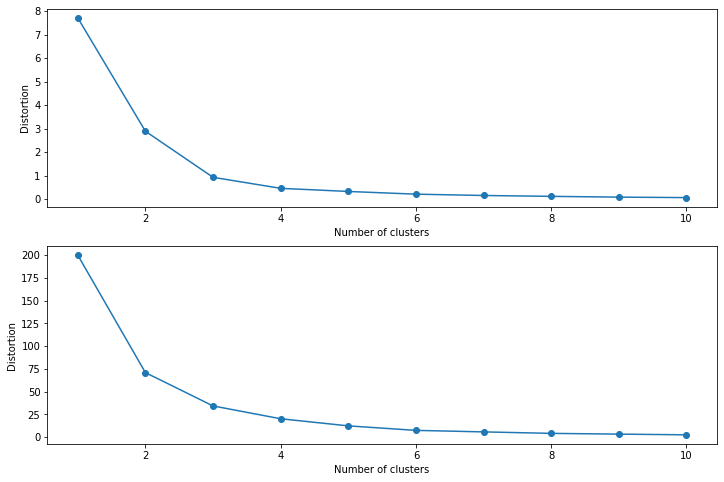

In [186]:
x_normal = x_normal.reshape(-1, 1)
x_scale = x_scale.reshape(-1, 1)

fig, ax = plt.subplots(2)
plot_distortion(x_normal,0)
plot_distortion(x_scale,1)

In [187]:
#silhouette score needs cluster from 1 to 9
def silhouette(X,max_clusters = 9):
    distortions = []
    
    for i in range(2, max_clusters +1):
        
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0).fit(X)
        
        labels = km.labels_
        
        distortions.append((i,metrics.silhouette_score(X, labels, metric='euclidean')))

    return(distortions)

In [188]:
silhouette(x_normal)

[(2, 0.682172586599642),
 (3, 0.6315019196600994),
 (4, 0.6211500651960734),
 (5, 0.6112118731536335),
 (6, 0.6118916412029171),
 (7, 0.5882858554787357),
 (8, 0.5844896355243424),
 (9, 0.6145295944227279)]

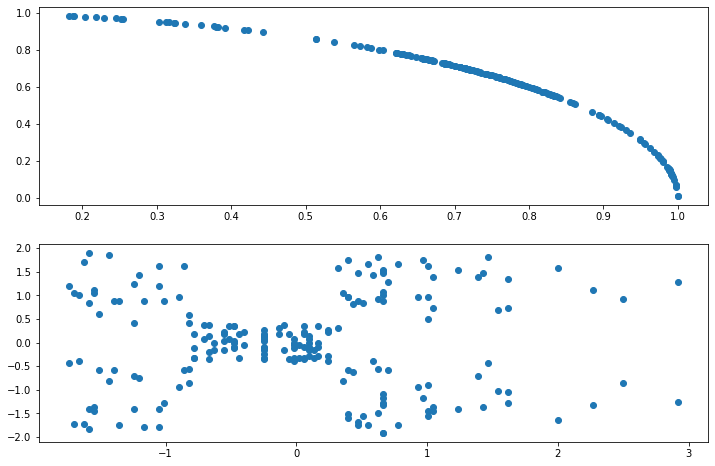

In [189]:
fig, ax = plt.subplots(2)
ax[0].scatter(x_normal,y_normal)
ax[1].scatter(x_scale,y_scale)

* fit model with optimal number of clusters

In [190]:
KM = KMeans(n_clusters = 2)
y_normal = KM.fit_predict(x_normal)
print('normalized is:',KM.inertia_)
y_scale = KM.fit_predict(x_scale)
print('scaled is:' ,KM.inertia_)

normalized is: 2.888458709167044
scaled is: 70.89430805868085


* define function plot_clusters

In [191]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        
        #print(cluster)
        #print(y_res == cluster)
        
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=100,
                    marker='.',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

* plot clusters

0.013891741583630948


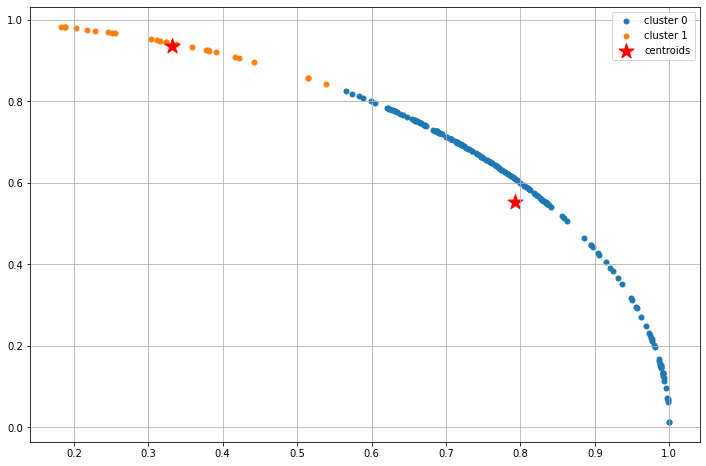

In [193]:
print(hopkins(data_normal,data_normal.shape[0]))
plot_clusters(data_normal,y_normal,True)

0.2883403973174455


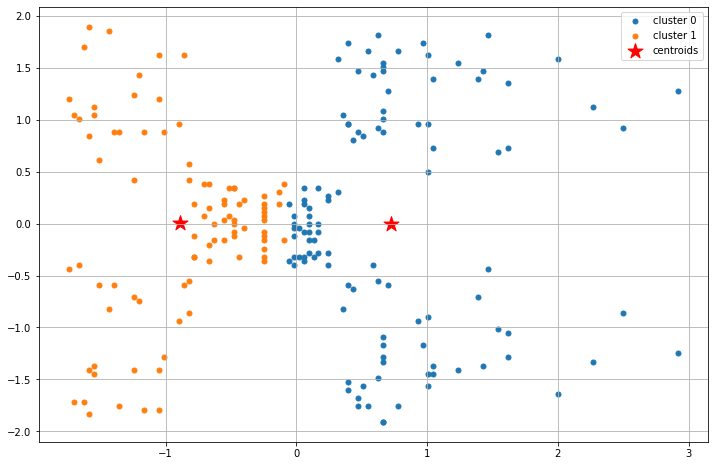

In [194]:
print(hopkins(data_scale,data_scale.shape[0]))
plot_clusters(data_scale,y_scale,True)